In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, extract


In [4]:
# Create Engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# Note: conn = engine.connect()

In [5]:
# Reflect an existing database into a new model

# Note: Sets an object to utilize the default base (database) in SQL Alchemy
base = automap_base()

# Reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results (plot below)
inspector=inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns("measurement")

# Note: You can also run code below to test database connection and select all values for only date and precipitation.
# session.query(measurement.date, measurement.prcp).all()


In [10]:
# Find the last date
# Note: Need ending ".date" otherwise comes in as string and won't work with twelve_months calculation
last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
last_date

'2017-08-23'

In [11]:
# Calculate the date 1 year ago from the last data point in the database
# Note: Strip time out and use class "datetime" and "timedelta" to calculate 365 delta from last_date
twelve_months = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)
twelve_months

datetime.datetime(2016, 8, 23, 0, 0)

In [12]:
# Perform a query to retrieve the data and precipitation scores
# Note: Retrieve the last 12 months of precipitation data in measurement.prcp
last_year = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date >= twelve_months).\
                    group_by(Measurement.date).all()
last_year

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Note: Data = the last 12 months of precipitation
year_precip_df = pd.DataFrame(last_year, columns=["Date", "Precipitation"])
year_precip_df.set_index("Date")

# Sort the dataframe by date
# Note: Inplace=true means to overwrite the existing dataframe in it's place
year_precip_df.sort_values(by=["Date"], inplace=True)

year_precip_df.head(10)

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
5,2016-08-29,0.00
6,2016-08-30,0.00
7,2016-08-31,0.13
8,2016-09-01,0.00
9,2016-09-02,0.00


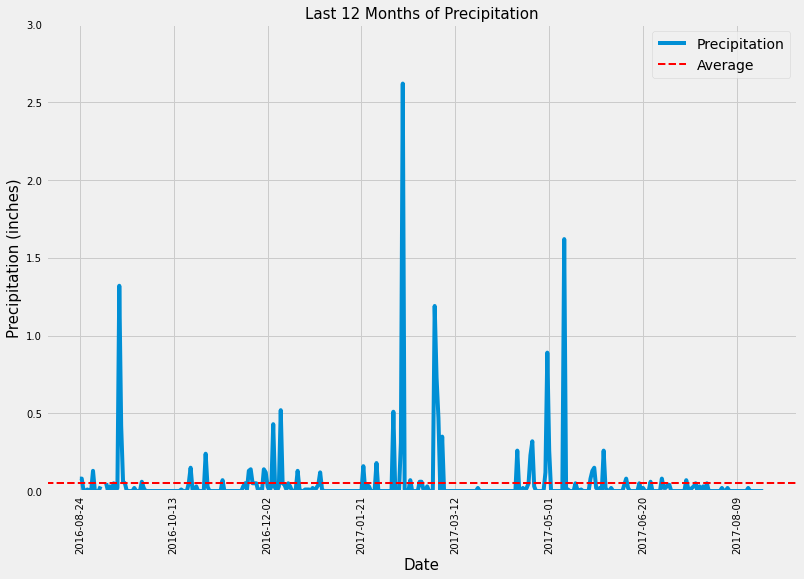

In [25]:
# Use Pandas Plotting with Matplotlib to plot the data
# Note: Plotting results from last 12 months of precipitation data
year_precip_df.plot("Date", "Precipitation", figsize=(12,8))
                                             
plt.ylim(0,3)
plt.title("Last 12 Months of Precipitation", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Precipitation (inches)", fontsize=15)
plt.legend(["Precipitation"])
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Note: Added mean horizontal line
plt.axhline(year_precip_df["Precipitation"].mean(), color="r", linestyle="dashed", linewidth=2, label="Average")
plt.legend()

# Save chart image (optional)
# Note: put this before plt.show otherwise image will save as black box.
plt.savefig("images/Last_12Months_Precipitation.png")

# Display chart
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Note: use .describe() and round decimals
year_precip_df.describe().round(decimals=2)

,Precipitation
count,363.00
mean,0.05
std,0.21
min,0.00
25%,0.00
50%,0.00
75%,0.02
max,2.62


In [16]:
# Design a query to show how many stations are available in this dataset
station_count=session.query(Station.station).count()
print(f"There are {station_count} available stations in this dataset.")

#Note: Or use code below to run a simple count query
#session.query(station.id).count()

There are 9 available stations in this dataset.


In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# Note: Using \ to line wrap long code string for easier coding and troubleshooting. Tab spacing is optional.
station_results = session.query(Measurement.station,func.count(Measurement.station))\
                .group_by(Measurement.station)\
                .order_by(func.count(Measurement.station)\
                .desc()).all()
station_results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Note: station_results[0][0] returns only the station, station_results[0] returns both station and total observations (tobs) count.
most_active = station_results [0][0]
station_results [0][0]


'USC00519281'

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
              .filter(Measurement.station == most_active).all()


[(54.0, 85.0, 71.66378066378067)]

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram. (plot below)

temp_results = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == most_active).\
                filter(Measurement.date >= twelve_months).all()
temps_df = pd.DataFrame(temp_results)
temps_df.set_index("station", inplace=True)
temps_df.head()

,tobs
station,
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0


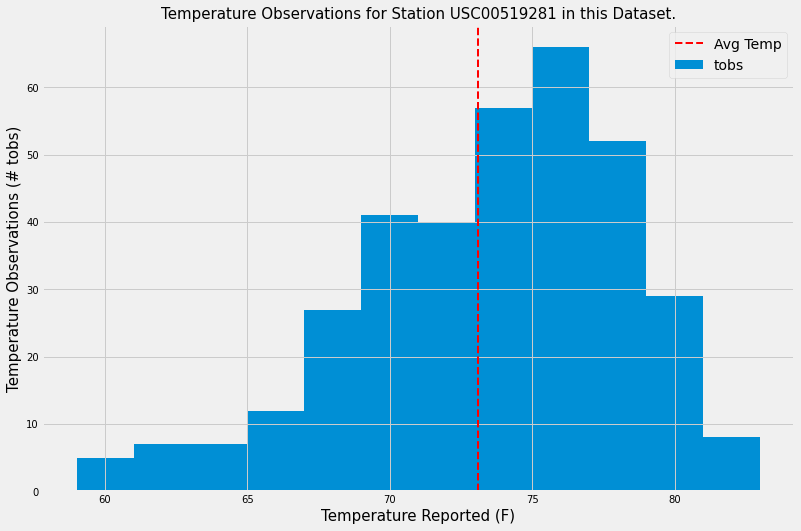

In [22]:
# Plot the results as a histogram (last 12 months of temperature observation data for this station) with `bins=12`.

temps_df.plot.hist(bins=12, figsize=(12,8), zorder=0)

plt.title(f"Temperature Observations for Station {most_active} in this Dataset.", fontsize=15)
plt.xlabel("Temperature Reported (F)", fontsize=15)
plt.ylabel("Temperature Observations (# tobs)", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


# Note: Added mean vertical line
plt.axvline(temps_df["tobs"].mean(), color="r", linestyle="dashed", linewidth=2, label="Avg Temp")
plt.legend() 

# Save chart image (optional)
# Note: put this before plt.show otherwise image will save as black box.
plt.savefig("images/Last_12Months_Temperature.png")

# Display chart
plt.show()

## Bonus Challenge

In [23]:
# No bonus.

In [24]:
session.close()